In [1]:
#Load packages
library(Seurat)
library(tidyverse)
library(reticulate)

Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Check python configurations.

We are using the `scanpy` modules to do PCA, construct neighborhood graph (through bbknn), leiden clustering and UMAP. For all these, we will use `reticulate` to wrap the functions.

Check that the python paths are set up correctly. In this case, I'm pointing it to my conda virtual environment called `mypython3`. The path to the python is thus `/home/jovyan/my-conda-envs/mypython3/bin/python`.

In [2]:
reticulate::use_condaenv('mcpython')

In [2]:
#Check reticulate configurated to correct python
reticulate::py_config()

python:         /opt/conda/bin/python3
libpython:      /opt/conda/lib/libpython3.8.so
pythonhome:     /opt/conda:/opt/conda
version:        3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27)  [GCC 9.3.0]
numpy:          /opt/conda/lib/python3.8/site-packages/numpy
numpy_version:  1.20.1

python versions found: 
 /opt/conda/bin/python3
 /usr/bin/python3
 /usr/bin/python

To simplify matters, I added `Sys.setenv(RETICULATE_PYTHON = '/home/jovyan/my-conda-envs/mypython3/bin/python')` to my `~/.Rprofile` (a file that is automatically run everytime R is booted up). This is a requirement for working through RStudio otherwise it won't find the right python.

### Read in data (already saved as Seurat object)

In [3]:
#Set working directory 
setwd("/home//jovyan/")

In [4]:
#Load in data with subset labels
data <- readRDS('data/ClatCov/COV_subsetanno1_raw_120721.rds') 
#This is data that has already been preprocessed by me
data

An object of class Seurat 
25675 features across 292189 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [5]:
data@meta.data

,latent_RT_efficiency,latent_cell_probability,latent_scale,doublet_score,predicted_doublet,Sampleid,Patient,Sampletype,Age_group,Gender,⋯,pct_counts_mt,celltypist,combined_doublet,cellbender_cell,leiden,broad_label,fine_label,moderate-severe,subset_annotation,subset_annotations
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
CGCTTCACAAGAAGAG-1-0-0,9.639492,1.0000000,59.972996,0.09428768,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,1.57289779,Plasmablasts,False,TRUE,10,B,IgM+ Plasmablast,No,10,Plasmablast IgM+
GGACATTCATAGACTC-1-0-0,5.833257,1.0000000,1614.982300,0.12786315,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,2.28192592,Plasmablasts,False,TRUE,3,Plasma,Plasma IgA,No,3,Plasma
GCACATAGTAAGGATT-1-0-0,8.461997,1.0000000,256.971954,0.08226007,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,1.98880374,Plasmablasts,False,TRUE,3,Plasma,Plasma IgA,No,3,B FO
GACGTGCTCGTAGATC-1-0-0,8.653172,1.0000000,67.775795,0.15230461,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,0.65571243,Plasmablasts,False,TRUE,3,Plasma,Plasma IgA,No,3,Plasma
CTCTGGTAGTACGTAA-1-0-0,7.128809,1.0000000,47.314678,0.11606663,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,0.59182543,Plasmablasts,False,TRUE,3,Plasma,Plasma IgA,No,3,Plasma
TCCCGATCAAGTAGTA-1-0-0,7.757183,1.0000000,775.689880,0.13222156,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,1.24979711,Plasmablasts,False,TRUE,3,Plasma,Plasma IgA,No,3,Plasma
TATCTCACAGATTGCT-1-0-0,9.283535,1.0000000,9.838756,0.05814717,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,0.07848524,Plasmablasts,False,TRUE,3,Plasma,Plasma IgA,No,3,Plasma
GATGAAAAGCGCCTCA-1-0-0,8.028753,1.0000000,197.850998,0.10911885,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,1.15138590,Plasmablasts,False,TRUE,3,Plasma,Plasma IgA,No,3,Plasma
CATGACATCCAGTATG-1-0-0,7.232700,1.0000000,584.316284,0.06879472,False,Sample_Fq21,N01-001,Nasal,middle,M,⋯,2.07646012,Plasmablasts,False,TRUE,3,Plasma,Plasma IgA,No,3,Plasma


In [6]:
colnames(data@meta.data)

[1] "latent_RT_efficiency"     "latent_cell_probability" 
 [3] "latent_scale"             "doublet_score"           
 [5] "predicted_doublet"        "Sampleid"                
 [7] "Patient"                  "Sampletype"              
 [9] "Age_group"                "Gender"                  
[11] "Cohort"                   "Diseasetype"             
[13] "Batch"                    "Study"                   
[15] "Nasal_inflammation"       "COVID_severity"          
[17] "sampleid"                 "soup_correction"         
[19] "scrublet_score"           "nFeaturess_RNA"          
[21] "is_doublet"               "filter_rna"              
[23] "batch"                    "nFeaturess_RNA_by_counts"
[25] "total_counts"             "total_counts_mt"         
[27] "pct_counts_mt"            "celltypist"              
[29] "combined_doublet"         "cellbender_cell"         
[31] "leiden"                   "broad_label"             
[33] "fine_label"               "moderate-severe"         
[35] "subset_annotation"        "subset_annotations"

In [7]:
#Make Ident subset annotations 
Idents(data) <- 'subset_annotations'
levels(Idents(data))

[1] "B FO"                    "B Naive"                
 [3] "Basal epithelial"        "Basophil"               
 [5] "Bmem non-switched"       "Bmem switched"          
 [7] "CD4 Act"                 "CD4 Tcm"                
 [9] "CD4 Tem"                 "CD4 Th2"                
[11] "CD4 Th17"                "CD4 Tn"                 
[13] "CD4 Trm"                 "CD8 CTL"                
[15] "CD8 Tn"                  "CD8 Trm"                
[17] "Ciliated epithelial"     "DOUBLET"                
[19] "Endothelial-Stromal"     "Erythrocyte"            
[21] "Follicular DC"           "ILC"                    
[23] "Ionocyte"                "MAIT"                   
[25] "Macrophage non-resident" "Macrophage resident"    
[27] "Mast"                    "Megakaryocyte"          
[29] "Monocyte classical"      "Monocyte non-classical" 
[31] "NK CD16+"                "NK CD56+"               
[33] "Plasma"                  "Plasmablast IgM+"       
[35] "Secretory epithelial"    "Squamous epithelial"    
[37] "Tfh"                     "Treg"                   
[39] "aNK KLRC2+"              "cDC CD1c+"              
[41] "cDC CD141+"              "gdT vd1"                
[43] "gdT vd2"                 "gdT vd3"                
[45] "pDC"

In [ ]:
#What do I need to do
#COVID vs healthy and Moderate-Severe COVID vs healthy and vasculitis vs healthy
#First subset out each celltype

In [10]:
#Split object into a list of separate objects by celltype
list <- SplitObject(data, split.by = 'subset_annotations')
list

$`Plasmablast IgM+`
An object of class Seurat 
25675 features across 6535 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$Plasma
An object of class Seurat 
25675 features across 6150 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`B FO`
An object of class Seurat 
25675 features across 6183 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$DOUBLET
An object of class Seurat 
25675 features across 24345 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`Basal epithelial`
An object of class Seurat 
25675 features across 1284 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional r

In [42]:
#COVID vs healthy - for each celltype jsut keep the active cov and healthy subject cells
list.CovH <- lapply(X = list, FUN = function(x) {
    x <- subset(x, subset = Diseasetype %in% c('Active COV', 'Healthy control'))
})
list.CovH

$`Plasmablast IgM+`
An object of class Seurat 
25675 features across 990 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$Plasma
An object of class Seurat 
25675 features across 3224 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`B FO`
An object of class Seurat 
25675 features across 3135 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$DOUBLET
An object of class Seurat 
25675 features across 12522 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`Basal epithelial`
An object of class Seurat 
25675 features across 610 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional red

In [481]:
#Vasculitis vs cov - for each celltype just keep the GPA and healthy subject cells
list.VH <- lapply(X = list, FUN = function(x) {
    x <- subset(x, subset = Diseasetype %in% c('GPA control', 'Healthy control'))
})
list.VH

$`Plasmablast IgM+`
An object of class Seurat 
25675 features across 982 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$Plasma
An object of class Seurat 
25675 features across 2105 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`B FO`
An object of class Seurat 
25675 features across 2750 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$DOUBLET
An object of class Seurat 
25675 features across 10568 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`Basal epithelial`
An object of class Seurat 
25675 features across 663 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional red

In [21]:
#Moderate or severe covid vs healthy - take active covid vs healthy subset list then for each celltype just keep severe covid, moderate covid or NAs(for healthy controls)  
list.sCOVH <- lapply(X = list.CovH, FUN = function(x) {
    x <- subset(x, subset = COVID_severity %in% c('severe', 'moderate', NA))
})
list.sCOVH

$`Plasmablast IgM+`
An object of class Seurat 
25675 features across 831 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$Plasma
An object of class Seurat 
25675 features across 2134 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`B FO`
An object of class Seurat 
25675 features across 1794 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$DOUBLET
An object of class Seurat 
25675 features across 8082 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`Basal epithelial`
An object of class Seurat 
25675 features across 550 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional redu

In [22]:
#Mild active covid vs healthy. 
list.mCOVH <- lapply(X = list.CovH, FUN = function(x) {
    x <- subset(x, subset = COVID_severity %in% c('mild', NA))
})
list.mCOVH

$`Plasmablast IgM+`
An object of class Seurat 
25675 features across 581 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$Plasma
An object of class Seurat 
25675 features across 1831 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`B FO`
An object of class Seurat 
25675 features across 1888 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$DOUBLET
An object of class Seurat 
25675 features across 8326 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

$`Basal epithelial`
An object of class Seurat 
25675 features across 162 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional redu

In [29]:
levels(Idents(list.mCOVH$`B FO`))

[1] "B FO"

In [19]:
colnames(data@meta.data)

[1] "Active COV"      "Conval COV"      "GPA control"     "Healthy control"

In [37]:
names(list.CovH)

[1] "Plasmablast IgM+"        "Plasma"                 
 [3] "B FO"                    "DOUBLET"                
 [5] "Basal epithelial"        "Tfh"                    
 [7] "Secretory epithelial"    "Bmem switched"          
 [9] "cDC CD1c+"               "CD4 Tem"                
[11] "CD4 Tcm"                 "Ciliated epithelial"    
[13] "Macrophage resident"     "Monocyte classical"     
[15] "CD8 Trm"                 "Mast"                   
[17] "Bmem non-switched"       "pDC"                    
[19] "NK CD56+"                "ILC"                    
[21] "CD8 Tn"                  "cDC CD141+"             
[23] "Treg"                    "CD4 Trm"                
[25] "CD4 Th2"                 "CD4 Tn"                 
[27] "CD4 Th17"                "B Naive"                
[29] "NK CD16+"                "CD4 Act"                
[31] "CD8 CTL"                 "Ionocyte"               
[33] "MAIT"                    "gdT vd2"                
[35] "Squamous epithelial"     "Endothelial-Stromal"    
[37] "Follicular DC"           "gdT vd3"                
[39] "gdT vd1"                 "Megakaryocyte"          
[41] "Macrophage non-resident" "Monocyte non-classical" 
[43] "Erythrocyte"             "Basophil"               
[45] "aNK KLRC2+"

In [64]:
#Couldn't get this to work so had to do rest manually. 
list.COVHDEG <- lapply(X = list.CovH, FUN = function(x) {
    Idents(x) <- 'Diseasetype'
    x <- FindMarkers(x, ident.1 = 'Active COV', ident.2 = 'Healthy control', logfc.threshold = 1, min.pct = 0.25, only.pos = F)
})
list.COVHDEG

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”


ERROR: Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2, : Cell group 1 has fewer than 3 cells


In [639]:
#Call idents as diseasetype (done for each cell subset in each list manually)
cell <- list.VH$Treg
cell
Idents(cell) <- 'Diseasetype'
levels(Idents(cell))


An object of class Seurat 
25675 features across 2063 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

[1] "GPA control"     "Healthy control"

In [640]:
# Find markers for disease vs healthy - done manually for all celltypes in each of the disease lists. 
DEG <- FindMarkers(cell, ident.1 = 'GPA control', ident.2 = 'Healthy control', logfc.threshold = 1, min.pct = 0.25, only.pos = F)
DEG

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”


avg_log2FC,pct.1,pct.2
<dbl>,<dbl>,<dbl>


In [637]:
keep_idx_DEG <-  grep('^RPS|^RPL|^MRPS|^MRPL|^MT-', row.names(DEG), invert =T)
DEG_filtered <- DEG[keep_idx_DEG, ]
DEG_filtered

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MTRNR2L12,1.073610e-56,4.515186,0.319,0.031,2.756494e-52
TSC22D3,6.051609e-22,1.001530,0.562,0.330,1.553751e-17
FKBP5,8.578016e-14,1.114648,0.440,0.284,2.202406e-09
CXCL13,3.622386e-11,2.130569,0.319,0.192,9.300476e-07


In [638]:
# save
write.csv(DEG_filtered, 'data/ClatCov/DEGS/VasculitisvHealthy/DEG__VH.csv')

In [21]:
#Not used
#Matt - How to remove results that do not have stat sig p value (without doing manually)
#DEG_filtered_covSev_sigP <- subset(DEG_sevCov_filtered, p_val_adj < 1e-02, select = c(p_val:p_val_adj))
#DEG_filtered_covSev_sigP

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LAPTM5,0,-0.3461664,0.456,0.666,0
KHDRBS1,0,-0.2928166,0.179,0.300,0
SFPQ,0,-0.6177687,0.169,0.324,0
SMAP2,0,-0.3253869,0.130,0.254,0
YBX1,0,-0.3459334,0.409,0.586,0
S100A4,0,1.3909283,0.553,0.503,0
TPM3,0,-0.4215733,0.288,0.478,0
TAGLN2,0,-0.4624617,0.298,0.459,0
PTPRC,0,-0.5159685,0.345,0.611,0


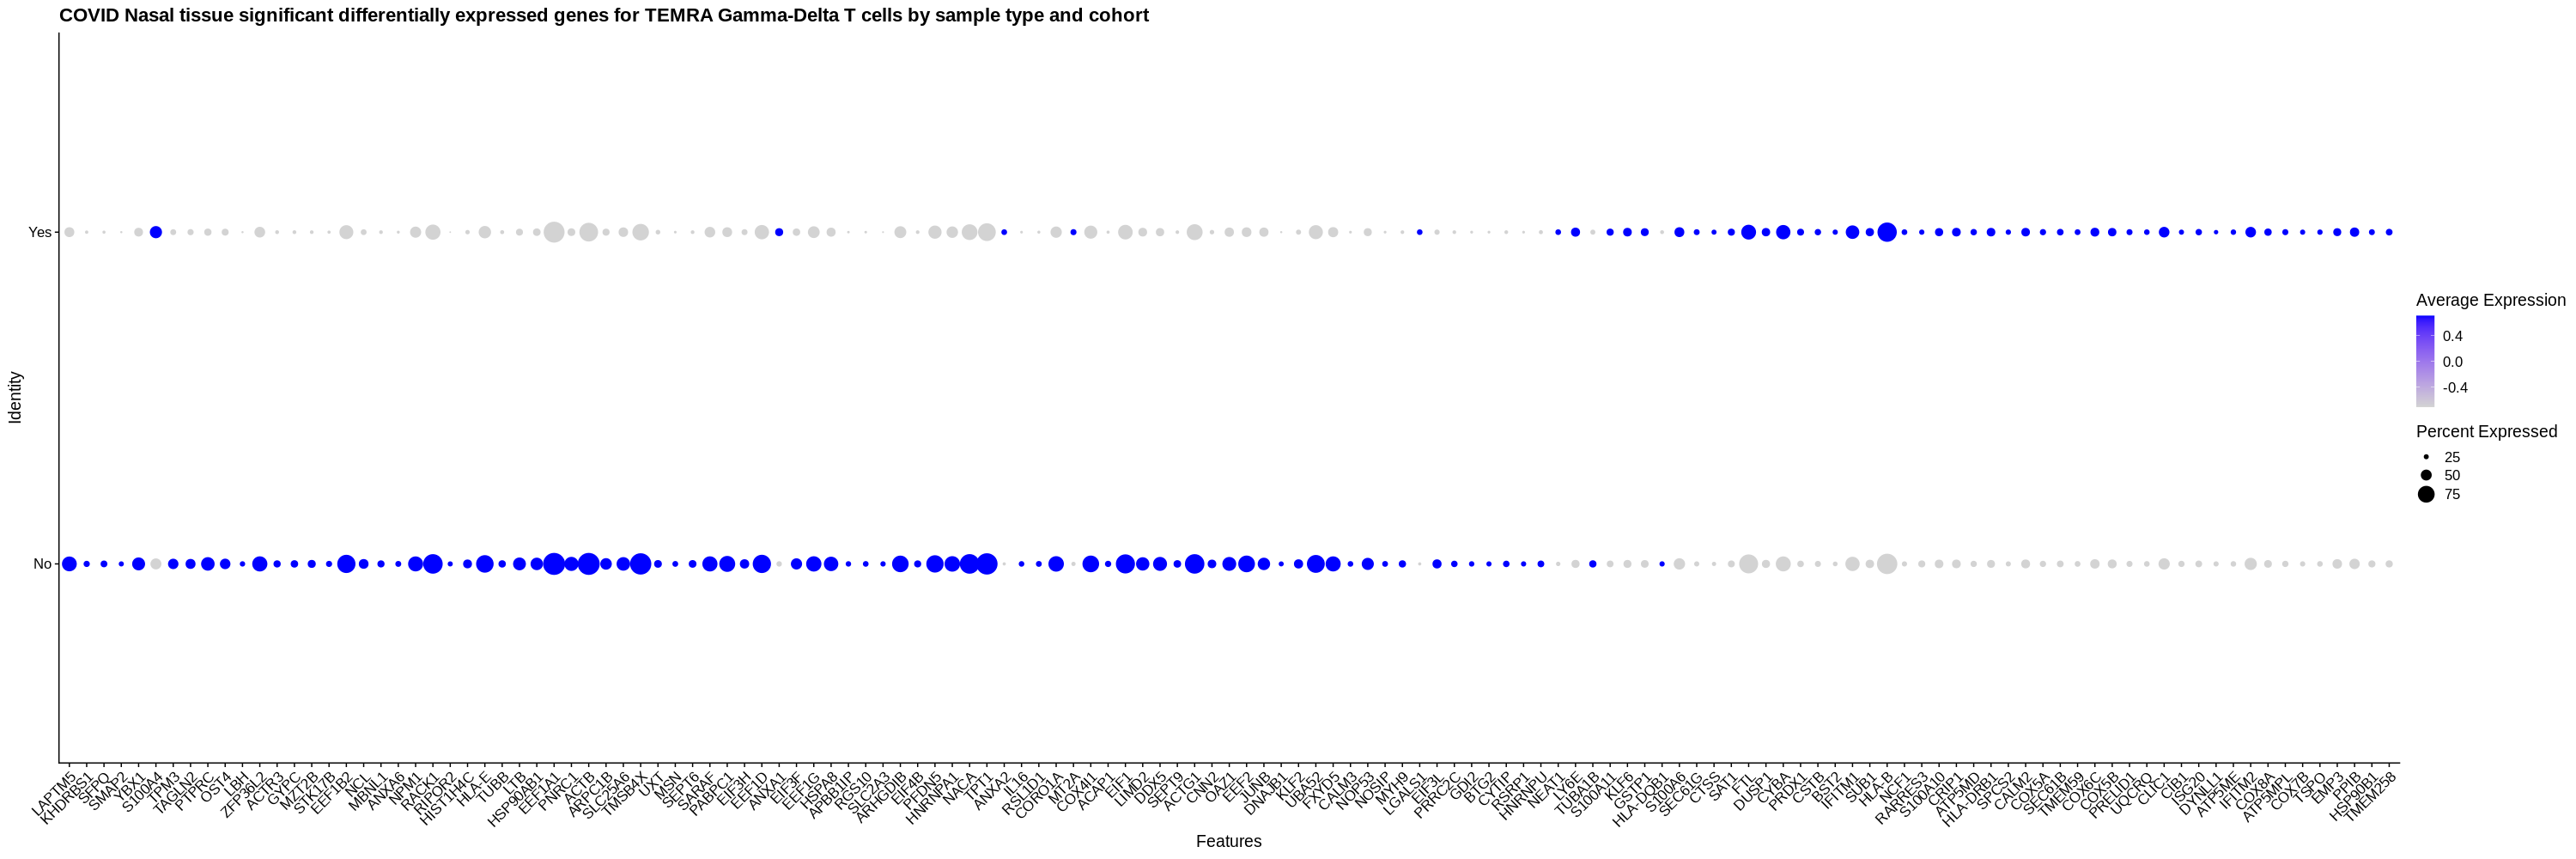

In [23]:
#Dotplot of DEGs
options(repr.plot.width = 30, repr.plot.height = 10, repr.plot.res = 100)
DotPlot(data, features = rownames(DEG_filtered_covSev_sigP), dot.scale = 8, scale = TRUE) + RotatedAxis() + ggtitle("COVID Nasal tissue significant differentially expressed genes for TEMRA Gamma-Delta T cells by sample type and cohort")

In [76]:
pdf("data/ClatCov/Plots/DEG_Nasal_COV_Age.pdf", width = 40, height = 8)
p1
dev.off()

png 
  2